In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
conn = sqlite3.connect('database.db')

In [3]:
ck = conn.cursor()

In [4]:
ck.executescript('drop table if exists barang')
ck.executescript('drop table if exists tanggal')
ck.executescript('drop table if exists penjualan')

ck.execute("CREATE TABLE IF NOT EXISTS 'barang' ('id' INT, 'nama' VARCHAR(255) NULL, 'harga' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ck.execute("CREATE TABLE IF NOT EXISTS 'tanggal' ('id' INT, 'tanggal' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ck.execute("CREATE TABLE IF NOT EXISTS 'penjualan' ( 'id' INT, 'jumlah_barang' INT NOT NULL, 'subtotal' INT NOT NULL,'id_barang' INT NULL, 'id_tanggal' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('id_barang') REFERENCES 'barang' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('id_tanggal') REFERENCES 'tanggal' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [5]:
df = pd.read_csv("tugas-bu-farida-data-SET.csv")
df

,id,nama,harga,jumlah,tanggal transaksi,kasir,total
0,1.0,dairy scm 385,"12,000",2.0,17-11-2020/7.00,adit,"24,000"
1,2.0,dairy scm 48x500 gr,"50,000",5.0,17-11-2020/7.20,adit,"250,000"
2,3.0,dairy scm 390 gr,"20,000",1.0,17-11-2020/7.40,adit,"20,000"
3,4.0,dairy scm 500 gr/48,"40,000",2.0,17-11-2020/8.00,adit,"80,000"
4,5.0,mama mia popok m-1sch,"25,000",3.0,17-11-2020/8.20,adit,"75,000"
...,...,...,...,...,...,...,...
96,97.0,gulaku 1 kg,"15,000",1.0,18-11-2020/22.20,aldi,"15,000"
97,98.0,sampoerna hijau,"20,000",4.0,18-11-2020/22.40,aldi,"80,000"
98,99.0,sampoerna slim,"18,000",5.0,18-11-2020/23.00,aldi,"90,000"
99,100.0,sampoerna kretek,"15,000",9.0,18-11-2020/23.20,aldi,"135,000"


In [6]:
barang = []
tanggal = []

for i,j in df.iterrows():
    if [j[1], j[2]] not in barang:
        barang.append([j[1], j[2]])
    h = -1
    for index, value in enumerate(barang):
        if value == [j[1], j[2]]: 
            h = index+1
            break
        
    if [j[4]] not in tanggal:
        tanggal.append([j[4]])
    c = -1
    for index, value in enumerate(tanggal):
        if value == j[4]:
            c = index+1
            break


penjualan = []
for i,j in df.iterrows():   
    h = -1
    for index, value in enumerate(barang):
        if value == [j[1], j[2]]: 
            h = index+1
            break
    
    c = -1
    for index, value in enumerate(tanggal):
        if value == j[4]:
            c = index+1
            break
    penjualan.append([j[3], j[6], h, c])

In [7]:
ck.execute("DELETE FROM BARANG")
for index, i in enumerate(barang): 
    ck.execute("INSERT INTO BARANG VALUES(" + str(index+1) + ", '" + str(i[0]) + "', '" + str(i[1]) + "')")
    
ck.execute("DELETE FROM TANGGAL")
for index, i in enumerate(tanggal): 
    ck.execute("INSERT INTO TANGGAL VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ck.execute("DELETE FROM PENJUALAN")
for index, i in enumerate(penjualan):
    id_barang = i[2]
    id_tanggal = i[3]
    ck.execute("INSERT INTO PENJUALAN VALUES(" + str(index+1) + ",'" + str(i[0]) + "', '" + str(i[1]) + "',"+ str(id_barang) + "," + str(id_tanggal) + ")")

    
conn.commit()

In [8]:
ck.execute('''SELECT * FROM BARANG''')

KOTA = []
for row in ck.fetchall():
    KOTA.append(row)
print("========================BARANG================================")
print(KOTA)
print("============================================================")

ck.execute('''SELECT * FROM TANGGAL''')

KOTA = []
for row in ck.fetchall():
    KOTA.append(row)
print("========================'TANGGAL'================================")
print(KOTA)
print("============================================================")


ck.execute('''SELECT * FROM PENJUALAN''')

KOTA = []
for row in ck.fetchall():
    KOTA.append(row)
print("========================PENJUALAN================================")
print(KOTA)
print("============================================================")

========================BARANG================================
[(1, 'dairy scm 385', '12,000'), (2, 'dairy scm 48x500 gr', '50,000'), (3, 'dairy scm 390 gr', '20,000'), (4, 'dairy scm 500 gr/48', '40,000'), (5, 'mama mia popok m-1sch', '25,000'), (6, 'mama mia popok L-10', '23,000'), (7, 'mama mia popok L-1', '30,000'), (8, 'mama mia popok XL-10', '25,500'), (9, 'mama mia popok S 10/20', '15,000'), (10, 'mama mia popok M 20/12', '17,000'), (11, 'mama mia popok L 20/12', '20,000'), (12, 'mama mia popok XL 20/12', '21,000'), (13, 'mama mia M 40/6', '21,500'), (14, 'mama mia pants M1/L1', '22,500'), (15, 'pampies S  10', '10,000'), (16, 'pampies S 20', '11,000'), (17, 'pampies L 10', '13,000'), (18, 'pampies L 20', '16,000'), (19, 'pampies M 20', '15,000'), (20, 'pampies M 10 ', '19,000'), (21, 'pampies XL 10', '15,500'), (22, 'pampies XL 20', '16,200'), (23, 'soklin pewangi 6sct 30ml pink', '2,000'), (24, 'soklin pewangi 6sct 30ml biru', '2,000'), (25, 'soklin pewangi 6sct 30ml merah', '

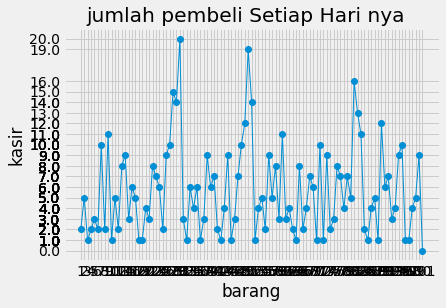

,barang,Jumlah
1,1.0,2.0
2,2.0,5.0
3,3.0,1.0
4,4.0,2.0
5,5.0,3.0
...,...,...
97,97.0,1.0
98,98.0,4.0
99,99.0,5.0
100,100.0,9.0


In [9]:
ck.execute('''select * from(select id_barang, avg(jumlah_barang) as jumlah_penonton from penjualan group by id_barang)''')
jumlah = []
for row in ck.fetchall():
    jumlah.append(row)
np_barang = np.array(jumlah)

plt.plot([int (x[0]) for x in np_barang [:,:]], [ float(x[1]) for x in np_barang[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_barang[:,:]], [ int(x[0]) for x in np_barang[:,:]])
plt.yticks([ float(x[1]) for x in np_barang[:,:]], [ float(x[1]) for x in np_barang[:,:]])
plt.xlabel('barang')
plt.ylabel('kasir')
plt.title("jumlah pembeli Setiap Hari nya  ")
plt.show()

df = pd.DataFrame([ x for x in np_barang[:,:]])
df.columns = ['barang', 'Jumlah']
df.index = np.arange(1,len(df)+1)
df

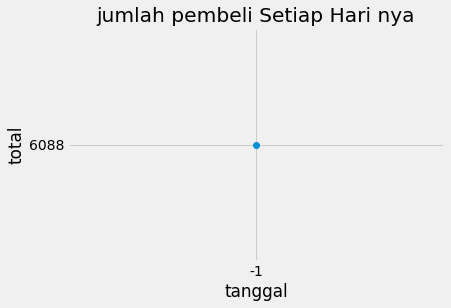

,tanggal,total
1,-1.0,6088.0


In [10]:
ck.execute('''select * from(select id_tanggal, sum(subtotal) as jumlah_penonton from penjualan group by id_tanggal)''')
jumlah = []
for row in ck.fetchall():
    jumlah.append(row)
np_tanggal = np.array(jumlah)

plt.plot([int (x[0]) for x in np_tanggal [:,:]], [ int(x[1]) for x in np_tanggal[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tanggal[:,:]], [ int(x[0]) for x in np_tanggal[:,:]])
plt.yticks([ int(x[1]) for x in np_tanggal[:,:]], [ int(x[1]) for x in np_tanggal[:,:]])
plt.xlabel('tanggal')
plt.ylabel('total')
plt.title("jumlah pembeli Setiap Hari nya")
plt.show()

df = pd.DataFrame([ x for x in np_tanggal[:,:]])
df.columns = ['tanggal', 'total']
df.index = np.arange(1,len(df)+1)
df